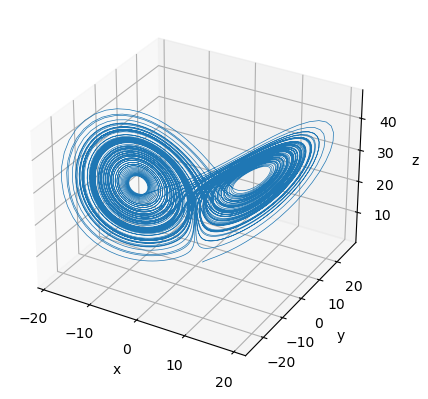

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz system
def lorenz(x, y, z, s=10, r=28, b=2.667):
    dxdt = s*(y - x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    return dxdt, dydt, dzdt

# Define the RK4 method
def rk4(x, y, z, f, dt):
    k1x, k1y, k1z = f(x, y, z)
    k2x, k2y, k2z = f(x + 0.5*dt*k1x, y + 0.5*dt*k1y, z + 0.5*dt*k1z)
    k3x, k3y, k3z = f(x + 0.5*dt*k2x, y + 0.5*dt*k2y, z + 0.5*dt*k2z)
    k4x, k4y, k4z = f(x + dt*k3x, y + dt*k3y, z + dt*k3z)
    x += dt*(k1x + 2*k2x + 2*k3x + k4x)/6
    y += dt*(k1y + 2*k2y + 2*k3y + k4y)/6
    z += dt*(k1z + 2*k2z + 2*k3z + k4z)/6
    return x, y, z

# Set initial conditions and time step
x0, y0, z0 = 1, 1, 1
dt = 0.01

# Create arrays to store the results
n = 10000
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)

# Integrate the system using RK4
for i in range(n):
    x0, y0, z0 = rk4(x0, y0, z0, lorenz, dt)
    x[i], y[i], z[i] = x0, y0, z0

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Enter initial x: 10
Enter initial y: 22
Enter initial z: 132
Enter time step: 0.01
Enter number of iterations: 123123


C:\Users\qkrwj\AppData\Local\Temp\ipykernel_21580\3504459830.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


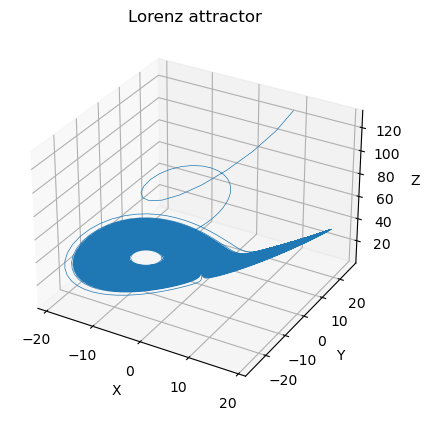

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz(x, y, z, s=10, r=28, b=2.667):
    dxdt = s*(y - x)
    dydt = r*x - y - x*z
    dzdt = x*y - b*z
    return dxdt, dydt, dzdt

def rk4(x, y, z, f, dt, s=10, r=28, b=2.667):
    k1x, k1y, k1z = f(x, y, z, s, r, b)
    k2x, k2y, k2z = f(x + 0.5*dt*k1x, y + 0.5*dt*k1y, z + 0.5*dt*k1z, s, r, b)
    k3x, k3y, k3z = f(x + 0.5*dt*k2x, y + 0.5*dt*k2y, z + 0.5*dt*k2z, s, r, b)
    k4x, k4y, k4z = f(x + dt*k3x, y + dt*k3y, z + dt*k3z, s, r, b)
    x += dt*(k1x + 2*k2x + 2*k3x + k4x)/6
    y += dt*(k1y + 2*k2y + 2*k3y + k4y)/6
    z += dt*(k1z + 2*k2z + 2*k3z + k4z)/6
    return x, y, z

def plot_lorenz(x0, y0, z0, s=10, r=28, b=2.667, dt=0.01, n=10000):
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)

    x[0], y[0], z[0] = x0, y0, z0

    for i in range(1, n):
        x[i], y[i], z[i] = rk4(x[i-1], y[i-1], z[i-1], lorenz, dt, s, r, b)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, z, lw=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Lorenz attractor')
    plt.show()

if __name__ == '__main__':
    x0 = float(input('Enter initial x: '))
    y0 = float(input('Enter initial y: '))
    z0 = float(input('Enter initial z: '))
    dt = float(input('Enter time step: '))
    n = int(input('Enter number of iterations: '))

    plot_lorenz(x0, y0, z0, s, r, b, dt, n)